In [1]:
#import pandas library for data manipulation and import data
import pandas as pd
#import regular expresion library
import re
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
#Loading the DataSet
data1 = pd.read_csv('C:/Users/ANIS Saadaoui/stbpage1.csv',sep=';',encoding="utf-8")
#Deleting unnecessary rows
data1.drop(data1.index[(data1['object_id']=='SocieteTunisiennedeBanquePageOfficielle')],axis=0,inplace=True)
data1.drop(data1.index[(data1['level']==1)],axis=0,inplace=True)
#Deleting unnecessary Columns
df1=data1.filter(['object_id','message','created_time'], axis=1)
# to display the first 5 lines of loaded data
df1.head()

C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,object_id,message,created_time
1197,1705140629671497_1705140983004795,مبرووك لكل الناجحين,2021-07-02T10:45:16+0000
1198,1705140629671497_1705147779670782,مبروك لكل الناجحين🥰,2021-07-02T10:59:18+0000
1199,1705140629671497_1705153456336881,Congratulations,2021-07-02T11:09:45+0000
1200,1705140629671497_1705269076325319,NaN,2021-07-02T14:20:03+0000
1201,1705140629671497_1705271162991777,نهار الاثنين مسكرين؟,2021-07-02T14:23:48+0000


In [2]:
#find the number of null value in each row
df1.isna().sum()

object_id           0
message         24521
created_time    18782
dtype: int64

In [3]:
#delele all line of dataset when we find null value
df1=df1.fillna({'message':0,'object_id':0})
df1.drop(df1.index[(df1['object_id']==0)],axis=0,inplace=True)
df1.drop(df1.index[(df1['message']==0)],axis=0,inplace=True)

In [4]:
#verification for deleting null value
df1.isna().sum()

object_id       0
message         0
created_time    0
dtype: int64

In [5]:
# #remove all punctuation like '? ! ; ..'
# import string 
# def remove_punctuation(text):
#     txt_nopunct= "".join([c for c in text if c not in string.punctuation])
#     return txt_nopunct

In [6]:
#remove alll urls like http:www.stb.com
def remove_urls(text):
    tk=TweetTokenizer() 
    text_tokens = tk.tokenize(text)
    url_pattern = re.compile(r'(https|http)?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [7]:
# #delete all number in all text in dataset
# def clean_numbers(text):
#     tk=TweetTokenizer() 
#     text_tokens = tk.tokenize(text)
#     # remove numbers
#     text_nonum = re.sub(r'\d+', '', text)
#     return text_nonum

In [8]:
#normalization text using wordnet for exemple 'gooooooood' become 'good'
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
replacer=RepeatReplacer()

In [9]:
#normalization text using wordnet for exemple 'gooooooood' become 'good'
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'

    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word
replacer=RepeatReplacer()
def normalization(text):
    token_words=word_tokenize(text)
    tokens_filtered=[]
    for token_word in token_words:
        tokens_filtered.append(replacer.replace(token_word))
    return " ".join(tokens_filtered)

In [10]:
#we use Enchant library  for spell checking and it's so fast than other spelling correct
# import the enchant module
import enchant
from nltk.metrics import edit_distance
class SpellingReplacer(object):
   # Creating and Using Dictionary Objects
    def __init__(self, dict_name='en', max_dist=2):
        self.spell_dict = enchant.Dict(dict_name)
        self.max_dist = max_dist
    def replace(self, word):
        if self.spell_dict.check(word):
            return word
        suggestions = self.spell_dict.suggest(word)
        if suggestions and edit_distance(word, suggestions[0]) <= self.max_dist:
            return suggestions[0]
        else:
            return word
replacer_en = SpellingReplacer()
class SpellingReplacer(object):
    def __init__(self, dict_name='fr', max_dist=2):
        self.spell_dict = enchant.Dict(dict_name)
        self.max_dist = max_dist
    def replace(self, word):
        if self.spell_dict.check(word):
            return word
        suggestions = self.spell_dict.suggest(word)
        if suggestions and edit_distance(word, suggestions[0]) <= self.max_dist:
            return suggestions[0]
        else:
            return word
replacer_fr = SpellingReplacer()

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
SIA = SentimentIntensityAnalyzer()

In [12]:
#remove urls in all message (rows) using apply 
df1['message'] = df1['message'].apply(remove_urls)
#remove all number in all message
# df1['message'] = df1['message'].apply(clean_numbers)
#remove all punctuation like '!,?,; ...'
# df1['message'] = df1['message'].apply(lambda text: remove_punctuation(text))

for language detection we decide to use fasttext .. we see that spacy and langdetect take more 1 min per loop but with fasttext it take 129 ms per loop  

In [13]:
#import fastext library
import fasttext
PRETRAINED_MODEL_PATH = 'C:/Users/ANIS Saadaoui/Downloads/lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)
def detector(text):
    # return empty string if there is no tweet
    if model.predict(text)[1] >0.6:
        return model.predict(text)[0][0].split("__label__")[1]
    else: 
        return 'unknown'
#use fonction detector for each row in df1['message'] to detect language
df1['language1'] = df1['message'].apply(detector)


In [14]:
# visualizing the comments' languages
ax = df1.language1.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));
ax

<AxesSubplot:>

<AxesSubplot:ylabel='language1'>

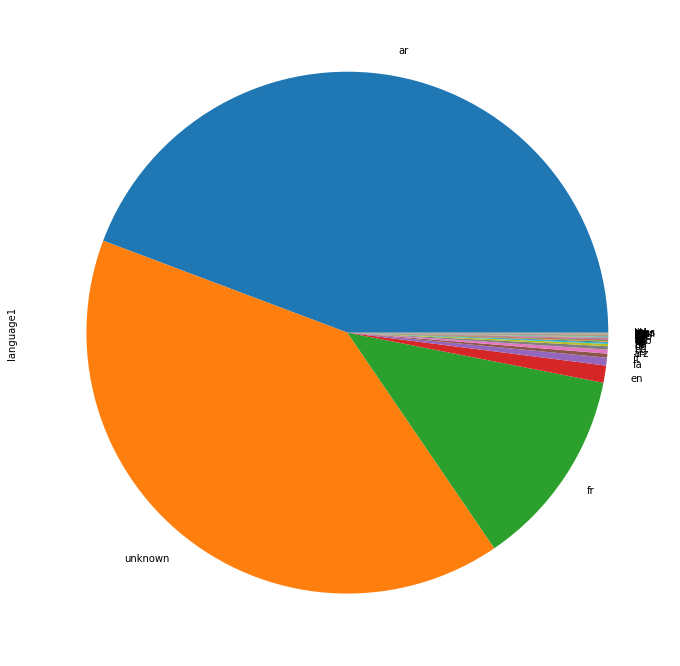

In [15]:
df1["language1"].value_counts(normalize=True).plot(kind='pie',figsize=(12,12))

In [16]:
# df1.to_csv('C:/Users/ANIS Saadaoui/Desktop/data/df_lang.csv')

In [17]:
# # df1.filterdf1['language1']=='ar'
# # df1.drop(['ar','fr','en','unknown'], axis=0)
# a=df1['language1'].value_counts()[:5].index.tolist()
# for i in a:
#     if df1['language1']==i:
#         return i
#     else: 'nan'

 By removing stopwords,we remove the low-level information from our text in order to give more focus to the important information also we are using much type tokenizers and we conclude that:
 
-whitespace tokenzier did'nt do well in date and urls .

-treebank/default tokenzier can destroy ':)' the emoji ,'# 'the hashtage, 'http' url and '@' username .

-tweet tokenzier is the best choice in facebook message. 

In [19]:
#remove stopword in english text
all_stopwords_en = stopwords.words('english')
def remove_mystopwords_en(sentence):
#      tknzr = TweetTokenizer()
    tk=TweetTokenizer() 
    text_tokens = tk.tokenize(sentence)
    tokens_filtered= [word.lower() for word in text_tokens if not word in all_stopwords_en]
    return (" ").join(tokens_filtered)
#remove stopword in fench text
all_stopwords_fr = stopwords.words('french')
def remove_mystopwords_fr(sentence):
    tk=TweetTokenizer() 
    text_tokens = tk.tokenize(sentence)
    tokens_filtered= [word.lower() for word in text_tokens if not word in all_stopwords_fr]
    return (" ").join(tokens_filtered)
all_stopwords_ar = stopwords.words('arabic')
#remove stopword in arabic text
def remove_mystopwords_ar(sentence):
    tk=TweetTokenizer() 
    text_tokens = tk.tokenize(sentence)
#     text_tokens = TweetTokenizer(sentence)
    tokens_filtered= [word.lower() for word in text_tokens if not word in all_stopwords_ar]
    return (" ").join(tokens_filtered)

In [20]:
#apply fonction remove_mystopwords in all rows
df1['message'] = df1['message'].apply(remove_mystopwords_en)
df1['message'] = df1['message'].apply(remove_mystopwords_fr)
df1['message'] = df1['message'].apply(remove_mystopwords_ar)

In [21]:
#filtre the english text in dataframe 
df_eng = df1[(df1['language1']=='en')]
df_eng1=df_eng['message']
#filtre the arabic text in dataframe 
df_ar  = df1[(df1['language1']=='ar')]
df_ar1=df_ar['message']
#filtre the french text in dataframe 
df_fr  = df1[(df1['language1']=='fr')]
df_fr1=df_fr['message']

In [22]:
df1.language1.value_counts().head()

ar         87181
unknown    79268
fr         24414
en          2087
fa           958
Name: language1, dtype: int64

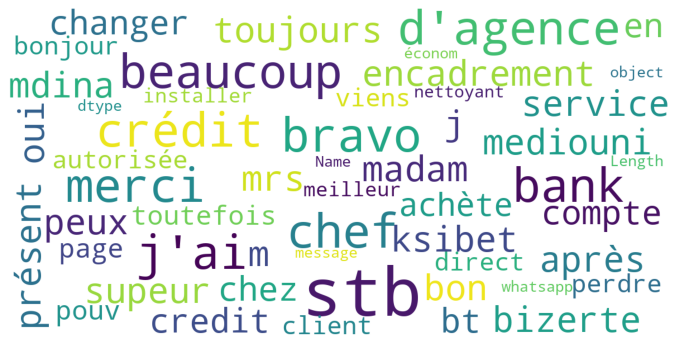

In [23]:
#make wordcloud for french message
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(df_fr1, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(df_fr1))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=100)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df_fr1)

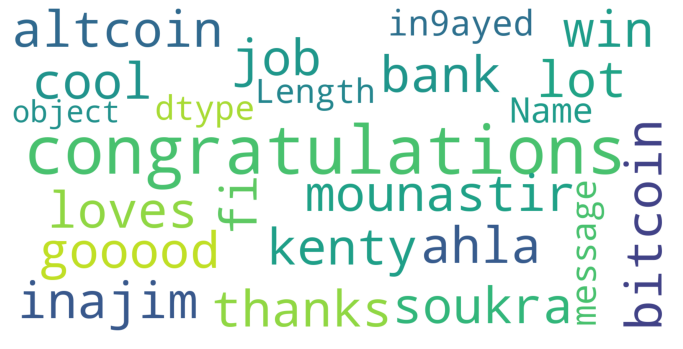

In [24]:
#make wordcloud for english message
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(df_eng1, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=4,
#         random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(df_eng1))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df_eng1)

In [25]:
# def reshaper(text):
#     a=arabic_reshaper.reshape(text)
#     return a

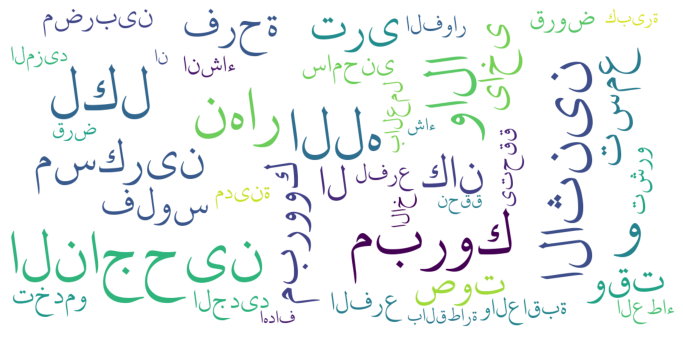

In [26]:
#make wordcloud for arabic message
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper # this was missing in your code
from bidi.algorithm import get_display

stopwords = set(STOPWORDS)
# data = get_display(data) # add this line
def show_wordcloud(df_ar1, title = None):
    wordcloud = WordCloud(
        font_path='/Users/ANIS Saadaoui/Documents/KFGQPC Uthmanic Script HAFS Regular/KFGQPC Uthmanic Script HAFS Regular.otf',
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
#         random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(df_ar1))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=100)
        fig.subplots_adjust(top=10)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df_ar1)

##### Why we don't use stemming

we are using three commmon stemming algorithm in the context of sentiment and we found that stemming collapses distinct word forms for exemple :
in porter stemmer and lancaster stemmer  destroy too many sentiment distinctions (exemple:affectation,affection ==>affect).
in the wordnet stemmer is high-precision and does not have this problem nearly so severly but it generally doesn't do enough collapsing to be worth the resources necessary to run it .

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append("")
    return " ".join(stem_sentence)
df_eng['token_stem'] = df_eng['message'].apply(stemSentence)
df_fr['token_stem'] = df_fr['message'].apply(stemSentence)
# df_ar['token_stem'] = df_ar['token_remove'].apply(stemSentence)

C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# def LemmatizationSentence(sentence):
#     token_words=word_tokenize(sentence)
#     token_words
#     lemma_sentence=[]
#     for word in token_words:
#         lemma_sentence.append(lemmatizer.lemmatize(word))
#         lemma_sentence.append("")
#     return " ".join(lemma_sentence)
# df_fr['token_lemma'] = df_fr['message'].apply(LemmatizationSentence)

In [29]:
df_eng['compound'] = df_eng['message'].apply(lambda message: SIA.polarity_scores(message))
df_eng['compound']  = df_eng['compound'].apply(lambda score_dict: score_dict['compound'])
df_eng['comp_score'] = df_eng['compound'].apply(lambda c: 'pos' if c >0 else ('neg' if c<0 else 'neut'))

C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ANIS Saadaoui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [30]:
df_eng['comp_score'].value_counts()

neut    1548
pos      525
neg       14
Name: comp_score, dtype: int64

<AxesSubplot:>

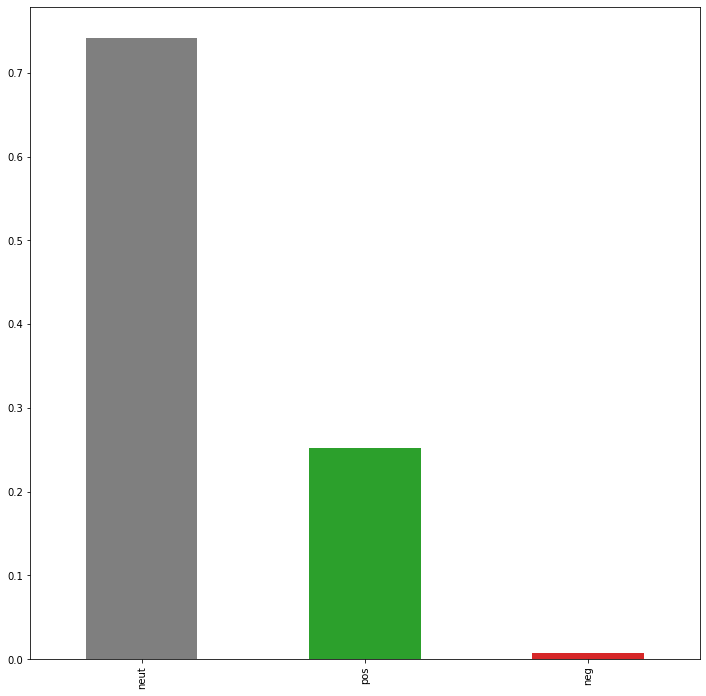

In [31]:
df_eng['comp_score'].value_counts(normalize=True).plot(kind='bar',figsize=(12,12),color=['#7f7f7f','#2ca02c', '#d62728'])

In [32]:
df_eng_neg=df_eng[df_eng['comp_score']=='neg']
df_eng_pos=df_eng[df_eng['comp_score']=='pos']

In [33]:
df_eng_neg

,object_id,message,created_time,language1,token_stem,compound,comp_score
33730,1557855311066697_1557884324397129,achref abbassi 😢 😢 😢,2020-12-22T10:18:15+0000,en,achref abbassi 😢 😢 😢,-0.8519,neg
64438,1017354955116738_1017374141781486,mabech yet 7ali :(,2019-03-13T19:26:00+0000,en,mabech yet 7ali : (,-0.4404,neg
64439,1017354955116738_1017374168448150,mabech yet 7ali :(,2019-03-13T19:26:12+0000,en,mabech yet 7ali : (,-0.4404,neg
73248,1557855311066697_1557884324397129,achref abbassi 😢 😢 😢,2020-12-22T10:18:15+0000,en,achref abbassi 😢 😢 😢,-0.8519,neg
103954,1017354955116738_1017374141781486,mabech yet 7ali :(,2019-03-13T19:26:00+0000,en,mabech yet 7ali : (,-0.4404,neg
103955,1017354955116738_1017374168448150,mabech yet 7ali :(,2019-03-13T19:26:12+0000,en,mabech yet 7ali : (,-0.4404,neg
109786,712016895650547_712030895649147,iness mess,2017-09-29T08:40:52+0000,en,iness mess,-0.3612,neg
144546,1557855311066697_1557884324397129,achref abbassi 😢 😢 😢,2020-12-22T10:18:15+0000,en,achref abbassi 😢 😢 😢,-0.8519,neg
175254,1017354955116738_1017374141781486,mabech yet 7ali :(,2019-03-13T19:26:00+0000,en,mabech yet 7ali : (,-0.4404,neg
175255,1017354955116738_1017374168448150,mabech yet 7ali :(,2019-03-13T19:26:12+0000,en,mabech yet 7ali : (,-0.4404,neg


We decide to translate all languages like arabic and french to english to be used with vader sentiment ,we use google translate api and it's high-precision in translation and helpful in normalization of word for exemple can uderstand that 'goooood' will replace by 'good' ,in future we will develop our neural network translation language i can be more fast and without limit request but not as precision in google translate 

In [34]:
from googletrans import Translator
translator = Translator()
translation = translator.translate("bon service bancaire", dest='en')
print(translation.text)

good banking service


In [35]:
df_eng

,object_id,message,created_time,language1,token_stem,compound,comp_score
1199,1705140629671497_1705153456336881,congratulations,2021-07-02T11:09:45+0000,en,congratul,0.5994,pos
1211,1705140629671497_1705153456336881,congratulations,2021-07-02T11:09:45+0000,en,congratul,0.5994,pos
1227,1704334576418769_1706424436209783,ahla bank,2021-07-04T02:27:38+0000,en,ahla bank,0.0000,neut
1602,1702254359960124_1702605623258331,mounastir,2021-06-29T03:48:58+0000,en,mounastir,0.0000,neut
1661,1700637940121766_1701391383379755,gooood job,2021-06-27T13:20:08+0000,en,gooood job,0.0000,neut
...,...,...,...,...,...,...,...
222558,669760293209541_681376755381228,+ 1 cool ! thanks lot,2017-07-15T09:30:16+0000,en,+ 1 cool ! thank lot,0.6696,pos
222564,669760293209541_681376892047881,who else loves bitcoin altcoin ?,2017-07-15T09:30:29+0000,en,who els love bitcoin altcoin ?,0.5719,pos
222672,645969308921973_646442832207954,where kenty ?,2017-04-28T05:50:59+0000,en,where kenti ?,0.0000,neut
222723,630772983774939_630833067102264,win fi soukra,2017-03-27T17:42:30+0000,en,win fi soukra,0.5859,pos


In [36]:
def translate(text):
    translator = Translator()
    translation = translator.translate(text, dest='en')
    return translation.text

In [37]:
#translate row by row in all data in french language
# df_fr1['translated_to_eng']=df_fr1['message'].apply(translate)

In [38]:
df_fr_en = pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/translate_fr_en.txt",names=['message_fr_en'],error_bad_lines=False, warn_bad_lines=False,encoding="utf-8")
# df_fr_en.to_csv('C:/Users/ANIS Saadaoui/Downloads/translate_fr_en.csv',sep='\n',header=None)

In [39]:
df_fr_en['message_fr_en1'] = df_fr_en['message_fr_en'].apply(lambda text: str(text))

In [40]:
df_fr_en['compound'] = df_fr_en['message_fr_en1'].apply(lambda message_fr_en: SIA.polarity_scores(message_fr_en))
df_fr_en['compound']  = df_fr_en['compound'].apply(lambda score_dict: score_dict['compound'])
df_fr_en['comp_score'] = df_fr_en['compound'].apply(lambda c: 'pos' if c >0 else ('neg' if c<0 else 'neut'))

In [41]:
df_fr_en

,message_fr_en,message_fr_en1,compound,comp_score
0,thank you very much head of agency ksibet medi...,thank you very much head of agency ksibet medi...,0.3612,pos
1,thank you good service,thank you good service,0.6597,pos
2,yes great supervision after stb bravo,yes great supervision after stb bravo,0.7783,pos
3,bravo stb always present,bravo stb always present,0.0000,neut
4,sousse,sousse,0.0000,neut
...,...,...,...,...
24393,can change an account with you jen credit bt,can change an account with you jen credit bt,0.3818,pos
24394,stb bank buys credits,stb bank buys credits,0.3612,pos
24395,stb bank page authorized come and lose b card ...,stb bank page authorized come and lose b card ...,0.3182,pos
24396,hello I have client stb I have direct credit r...,hello I have client stb I have direct credit r...,0.8020,pos


In [48]:
df_fr_en['comp_score'].value_counts()

pos     13520
neut     9036
neg      1842
Name: comp_score, dtype: int64

<AxesSubplot:>

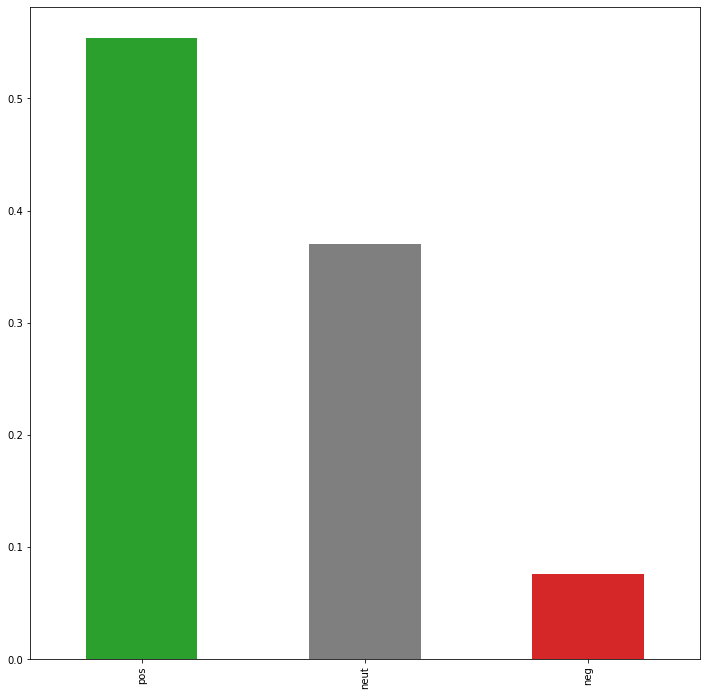

In [49]:
df_fr_en['comp_score'].value_counts(normalize=True).plot(kind='bar',figsize=(12,12),color=['#2ca02c','#7f7f7f', '#d62728'])

In [50]:
df_fr_en_neg=df_fr_en[df_fr_en['comp_score']=='neg']

In [51]:
df_fr = pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/df_fr.csv")

In [52]:
result_fr = pd.concat([df_fr_en, df_fr], axis=1)

In [53]:
result_fr_neg=result_fr[result_fr['comp_score']=='neg']
df_fr_pos=df_fr_en[df_fr_en['comp_score']=='pos']

In [54]:
result_fr['message_fr_en']

0        thank you very much head of agency ksibet medi...
1                                   thank you good service
2                    yes great supervision after stb bravo
3                                 bravo stb always present
4                                                   sousse
                               ...                        
24395    stb bank page authorized come and lose b card ...
24396    hello I have client stb I have direct credit r...
24397    install best whatsapp cleaner save android pho...
24398                                                  NaN
24399                                                  NaN
Name: message_fr_en, Length: 24400, dtype: object

In [27]:
# result_fr.to_csv('C:/Users/ANIS Saadaoui/Downloads/result_fr.csv')

We are build function deromanization using web scraping and tools like selenuim from yamli website to convert arabizi to arabic language for exemple "mar7aban" be converted to "مرحباً" and it's helpful to translate unknown language to arabic because most  unknow language are arabizi . 

In [55]:
import time 
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
def deromanization(text):
    option = webdriver.ChromeOptions()
    option.add_argument('headless')
    browser = webdriver.Chrome('C:/Users/ANIS Saadaoui/.wdm/drivers/chromedriver/chromedriver.exe',options=option)
    browser.get("https://www.yamli.com/fr/")
#     browser.find_element_by_id("search_input").clear()
    token_words=word_tokenize(text)
    for word in token_words:
        browser.find_element_by_id("search_input").send_keys(word)
        browser.find_element_by_id("search_input").send_keys(" ")
        time.sleep(0.3)
    a=browser.find_element_by_id("search_input").send_keys(Keys.CONTROL, 'a') # select all 
    x=browser.find_element_by_id("search_input").send_keys(Keys.CONTROL, 'x') #copy
#     browser.refresh()
    browser.find_element_by_id("search_input").clear()
    c=browser.find_element_by_id("search_input").send_keys(Keys.CONTROL, 'v') #past
#     new_text.send_keys(Keys.CONTROL, 'v')
    aa=browser.find_element_by_id("search_input").get_attribute("value")
    return aa

In [56]:
text='afdhel 5adamet bankiya'
deromanization(text)

'أفضل خدمات بنكية '

In [57]:
#import text translated 
import pandas as pd
df_ar_en = pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/ar_en1.txt",names=['message_ar_en'],error_bad_lines=False, warn_bad_lines=False,encoding="utf-8")

In [58]:
df_ar_en

,message_ar_en
0,Congrats to all the winners
1,Congratulations to all the winners
2,Monday night drunk?
3,You used to see the joy of the gab when you he...
4,My brother
...,...
87874,Forgive me
87875,Congratulations to the new branch and the cons...
87876,God willing
87877,dropper loan


In [59]:
df_ar_en['message_ar_en'] = df_ar_en['message_ar_en'].apply(lambda text: str(text))

In [60]:
df_ar_en['compound'] = df_ar_en['message_ar_en'].apply(lambda message_ar_en1: SIA.polarity_scores(message_ar_en1))
df_ar_en['compound']  = df_ar_en['compound'].apply(lambda score_dict: score_dict['compound'])
df_ar_en['comp_score'] = df_ar_en['compound'].apply(lambda c: 'pos' if c >0 else ('neg' if c<0 else 'neut'))

In [61]:
df_ar_en['comp_score'].value_counts()

neut    53185
pos     30660
neg      4034
Name: comp_score, dtype: int64

<AxesSubplot:ylabel='comp_score'>

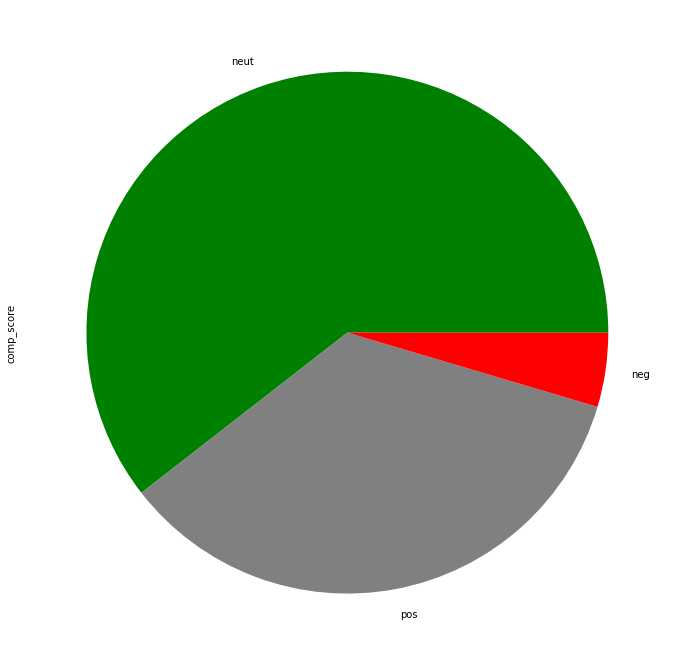

In [62]:
colors = ({'1': 'green',"2":'gray',"3":'red'})
df_ar_en['comp_score'].value_counts(normalize=True).plot(kind='pie',figsize=(12,12),colors = colors.values())

In [63]:
df_ar_en_neg=df_ar_en[df_ar_en['comp_score']=='neg']
df_ar_en_pos=df_ar_en[df_ar_en['comp_score']=='pos']


In [64]:
df_ar_en_pos

,message_ar_en,compound,comp_score
0,Congrats to all the winners,0.7579,pos
1,Congratulations to all the winners,0.7906,pos
3,You used to see the joy of the gab when you he...,0.5859,pos
5,By God,0.2732,pos
6,Congrats to all the winners,0.7579,pos
...,...,...,...
87873,Congratulations on the new branch,0.5994,pos
87874,Forgive me,0.2732,pos
87875,Congratulations to the new branch and the cons...,0.5994,pos
87876,God willing,0.2732,pos


In [65]:
df_fr_en_neg

,message_fr_en,message_fr_en1,compound,comp_score
45,how to decorate i received moneygram dinars ma...,how to decorate i received moneygram dinars ma...,-0.5859,neg
58,statement of money orders from switzerland alw...,statement of money orders from switzerland alw...,-0.7678,neg
107,ban que hello particular all employees the age...,ban que hello particular all employees the age...,-0.5574,neg
130,chbih ioli error,chbih ioli error,-0.4019,neg
133,fault,fault,-0.4019,neg
...,...,...,...,...
24259,bank scammers in deficit sorrel customers since,bank scammers in deficit sorrel customers since,-0.4019,neg
24260,unfortunately yelzem wasta w marif mouch profi...,unfortunately yelzem wasta w marif mouch profi...,-0.3400,neg
24279,awil contactihom private evil,awil contactihom private evil,-0.6597,neg
24321,billahi nheb naréf andi account blocked b year...,billahi nheb naréf andi account blocked b year...,-0.2732,neg


In [ ]:
# ar_to_en1
# ar_to_en1 = pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/df_ar.csv")

In [66]:
# df_ar = pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/df_ar.csv")

In [67]:
df_ar

,object_id,message,created_time,language1
1197,1705140629671497_1705140983004795,مبرووك لكل الناجحين,2021-07-02T10:45:16+0000,ar
1198,1705140629671497_1705147779670782,مبروك لكل الناجحين 🥰,2021-07-02T10:59:18+0000,ar
1201,1705140629671497_1705271162991777,نهار الاثنين مسكرين ؟,2021-07-02T14:23:48+0000,ar
1202,1705140629671497_1705280802990813,كان ترى فرحة الgab وقت تسمع صوت فلوس 🙊 🙊 😝 😝 😝,2021-07-02T14:41:08+0000,ar
1203,1705140629671497_1705877179597842,ياخي مضربين نهار الاثنين والا تخدمو,2021-07-03T08:54:13+0000,ar
...,...,...,...,...
222742,629453400573564_630892697096301,سامحني تشرو قروض والا ؟,2017-03-27T21:21:50+0000,ar
222750,626262987559272_635213736664197,مبروك الفرع الجديد والعاقبة لفرع مدينة الفوار ...,2017-04-05T15:13:35+0000,ar
222753,623283814523856_623285801190324,انشاء الله يتحقق بالعمل و المزيد العطاء و الاخ...,2017-03-10T17:21:16+0000,ar
222767,619728491546055_619958331523071,قرض بالقطارة,2017-03-03T21:05:54+0000,ar


In [68]:
df_ar_en

,message_ar_en,compound,comp_score
0,Congrats to all the winners,0.7579,pos
1,Congratulations to all the winners,0.7906,pos
2,Monday night drunk?,-0.3400,neg
3,You used to see the joy of the gab when you he...,0.5859,pos
4,My brother,0.0000,neut
...,...,...,...
87874,Forgive me,0.2732,pos
87875,Congratulations to the new branch and the cons...,0.5994,pos
87876,God willing,0.2732,pos
87877,dropper loan,0.0000,neut


In [69]:
result_ar = pd.concat([df_ar_en, df_ar], axis=1)

In [70]:
result_ar

,message_ar_en,compound,comp_score,object_id,message,created_time,language1
0,Congrats to all the winners,0.7579,pos,NaN,NaN,NaN,NaN
1,Congratulations to all the winners,0.7906,pos,NaN,NaN,NaN,NaN
2,Monday night drunk?,-0.3400,neg,NaN,NaN,NaN,NaN
3,You used to see the joy of the gab when you he...,0.5859,pos,NaN,NaN,NaN,NaN
4,My brother,0.0000,neut,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
222742,NaN,NaN,NaN,629453400573564_630892697096301,سامحني تشرو قروض والا ؟,2017-03-27T21:21:50+0000,ar
222750,NaN,NaN,NaN,626262987559272_635213736664197,مبروك الفرع الجديد والعاقبة لفرع مدينة الفوار ...,2017-04-05T15:13:35+0000,ar
222753,NaN,NaN,NaN,623283814523856_623285801190324,انشاء الله يتحقق بالعمل و المزيد العطاء و الاخ...,2017-03-10T17:21:16+0000,ar
222767,NaN,NaN,NaN,619728491546055_619958331523071,قرض بالقطارة,2017-03-03T21:05:54+0000,ar


In [72]:
# result_ar.to_csv('C:/Users/ANIS Saadaoui/Downloads/result_ar.csv')

In [73]:
import pandas as pd
df_ar_en_neg= pd.read_csv("C:/Users/ANIS Saadaoui/Downloads/df_ar_en_neg.csv")

In [74]:
df_ar_en_neg

,message_ar_en,compound,comp_score,object_id,message,created_time,language1
0,Monday night drunk?,-0.3400,neg,1705140629671497_1705271162991777,نهار الاثنين مسكرين ؟,2021-07-02T14:23:48+0000,ar
1,Monday night drunk?,-0.3400,neg,1705140629671497_1705271162991777,نهار الاثنين مسكرين ؟,2021-07-02T14:23:48+0000,ar
2,Khazindar branch unfortunately,-0.3400,neg,1703882999797260_1705820802936813,فرع خزندار للأسف تعاااسة,2021-07-03T07:37:18+0000,ar
3,Mondays are on strike,-0.1280,neg,1703882999797260_1705877449597815,نهار الاثنين اضراب والا عمل هادي,2021-07-03T08:54:37+0000,ar
4,Hadrat the death of Sousse,-0.5994,neg,1702254359960124_1702292893289604,حضر موت سوسة باب الغربي نهج القايد البلاد العربي,2021-06-28T17:01:54+0000,ar
...,...,...,...,...,...,...,...
4029,miserable services,-0.4939,neg,684444901741080_692019247650312,خدمات تعيسة,2017-08-08T07:12:45+0000,ar
4030,Disability and indifference to the country you...,-0.6597,neg,669760293209541_679878398864397,تعجيز و استهبال ملا بلاد كرهتونا,2017-07-11T21:50:24+0000,ar
4031,You couldn't love my Lord,-0.5216,neg,669760293209541_680290595489844,عجزتونا يحبو ربي يمشي يبنيى فوق دارهم,2017-07-12T20:29:02+0000,ar
4032,Something pissed off his parents in a room whe...,-0.6369,neg,669760293209541_692185097633727,شيء يسخفادمغ والديه بحجرة تو يركح,2017-08-08T17:09:39+0000,ar
